# 🚀 Diffusion-LM on E2E NLG Dataset with Cosine Noise Schedule (Google Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cd  /content/drive/MyDrive/Colab_Shared/Diffusion-LM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ✅ Step 1: Restart runtime after running this if you face numpy/mtrand issues
!pip install -q -r requirements.txt
!pip install pytorch torchvision torchaudio cudatoolkit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 124.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 136.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [transformers]


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-4.0.3-cp311-cp311-linux_x86_64.whl size=4442047 sha256=bf2a79f52065889aba010d1d4a1f083e5a4d97e3a42cea1502680e2048a7f009
  Stored in directory: /root/.cache/pip/wheels/5c/56/17/bf6ba37aa971a191a8b9eaa188bf5ec855b8911c1c56fb1f84
Successfully built mpi4py
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement cudatoolkit (from versions: none)
ERROR: No matching distribution found for cudatoolkit


In [ ]:
#!pip install benepar==0.1.1
!pip install benepar

In [ ]:
!pip install spacy_stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 158.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 193.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 197.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 30.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nv

In [ ]:
# ✅ Step 2: Import all required libraries
import torch
import transformers
import datasets
import spacy
import wandb
import benepar
torch.cuda.is_available()
print("✅ All packages imported successfully!")


✅ All packages imported successfully!


## 📦 Step 3: Clone Diffusion-LM repository and install dependencies

In [ ]:
# Clone the repo
!git clone https://github.com/XiangLi1999/Diffusion-LM.git
%cd Diffusion-LM

# Add repo to Python path (instead of pip install)
import sys
sys.path.append('/content/Diffusion-LM')


## 📁 Step 4: Download the E2E dataset

In [ ]:
!mkdir -p data/e2e_data
!wget https://github.com/tuetschek/e2e-dataset/blob/master/trainset.csv -O data/e2e_data/trainset.csv
!wget https://github.com/tuetschek/e2e-dataset/blob/master/devset.csv -O data/e2e_data/devset.csv
!wget https://github.com/tuetschek/e2e-dataset/blob/master/testset.csv -O data/e2e_data/testset.csv

# Preprocess the Dataset




In [ ]:
!python /content/Diffusion-LM/improved-diffusion/scripts/preprocess_data.py \
    --data_dir /content/Diffusion-LM/data/e2e_data \
    --dataset /content/Diffusion-LM/datasets/e2e_data \
    --tokenizer gpt2 \
    --output_dir /content/Diffusion-LM/datasets/processed_e2e

In [ ]:
!pip install -e improved-diffusion/
!pip install -e transformers/

### Set the Python path

In [ ]:
%cd //content/Diffusion-LM/improved-diffusion

In [ ]:
import sys
sys.path.append('/content/Diffusion-LM/improved-diffusion')

In [ ]:
import os
print(os.listdir('/content/Diffusion-LM'))

# Train the Model (Default Noise Schedule)

In [ ]:
!python /content/Diffusion-LM/improved-diffusion/scripts/train.py \
    --dataset /content/Diffusion-LM/datasets/e2e_data \
    --data_dir /content/Diffusion-LM/datasets/processed_e2e \
    --output_dir /content/Diffusion-LM/datasets/trained_e2e_baseline \
    --num_train_epochs 5 \
    --learning_rate 5e-5

In [ ]:
!python scripts/run_train.py --diff_steps 2000 --model_arch transformer --lr 0.0001 --lr_anneal_steps 200000  --seed 102 --noise_schedule sqrt --in_channel 16 --modality e2e-tgt --submit no --padding_mode block --app "--predict_xstart True --training_mode e2e --vocab_size 821  --e2e_train ../datasets/e2e_data " --notes xstart_e2e > decode_log.txt

In [ ]:
#backup !python /content/Diffusion-LM/improved-diffusion/scripts/run_train.py \
      --diff_steps 2000 \
      --model_arch transformer \
      --lr 0.0001 \
      --lr_anneal_steps 200000  \
      --seed 102 \
      --noise_schedule sqrt \
      --in_channel 16 \
      --modality e2e-tgt \
      --submit no \
      --padding_mode block \
      --notes xstart_e2e

In [ ]:
# !mkdir -p generation_outputs
# %cd "/content/drive/MyDrive/Colab_Shared/Diffusion-LM"

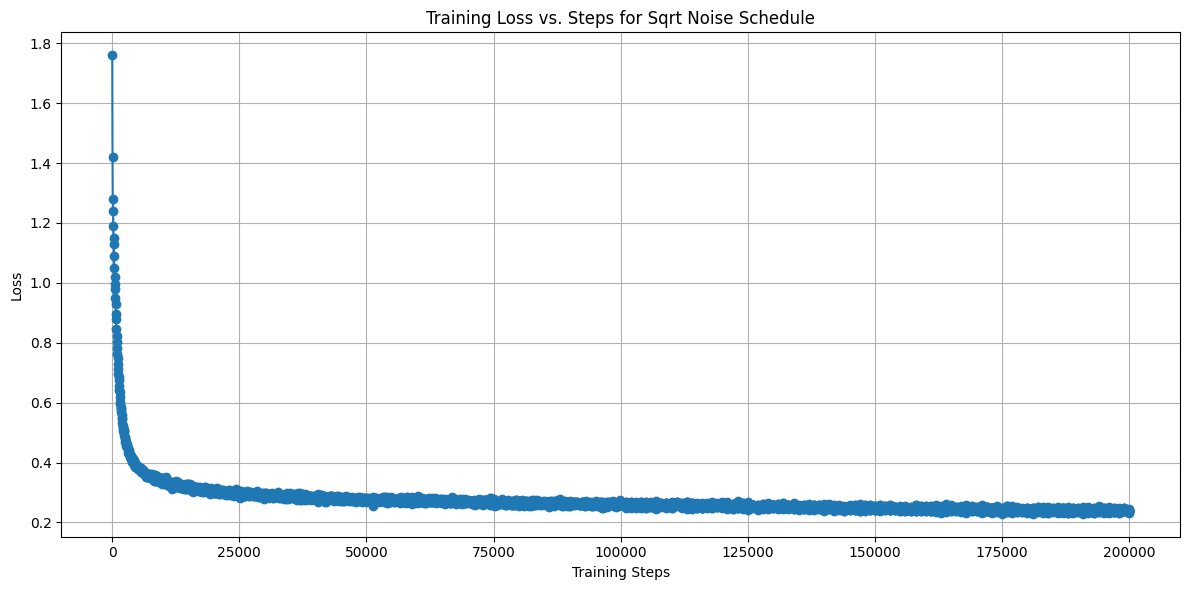

In [ ]:
import matplotlib.pyplot as plt
import re

log_file_path = '/content/drive/MyDrive/Colab Notebooks/capstone/Diffusion-LM/improved-diffusion/diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e/log.txt'

steps = []
losses = []

# Regex to find lines containing step and loss
step_loss_pattern = re.compile(r"\|\sstep\s+\|\s(\d+)\s+\|.*\|\sloss\s+\|\s([\d\.]+)\s+\|", re.DOTALL)

with open(log_file_path, 'r') as f:
    content = f.read()

    # Find all matches for the pattern
    matches = step_loss_pattern.findall(content)

    for match in matches:
        # The first training step log is usually a summary of eval loss,
        # we will capture the detailed training steps that follow.
        pass # The initial block is structured differently.

# A more robust way to capture the loss is to look for the specific table format.
log_blocks = content.split('------------------------')
for block in log_blocks:
    if 'loss' in block and 'step' in block:
        try:
            step_search = re.search(r"\|\s*step\s*\|\s*([\d.e+]+)\s*\|", block)
            loss_search = re.search(r"\|\s*loss\s*\|\s*([\d.]+)\s*\|", block)

            if step_search and loss_search:
                step = int(float(step_search.group(1)))
                loss = float(loss_search.group(1))
                steps.append(step)
                losses.append(loss)
        except (ValueError, IndexError) as e:
            print(f"Skipping block due to parsing error: {e}\n{block}")


# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(steps, losses, marker='o', linestyle='-')
plt.title('Training Loss vs. Steps for Sqrt Noise Schedule')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pwd
%cd /content/drive/MyDrive/Colab_Shared/Diffusion-LM

/content/drive/MyDrive/Colab_Shared/Diffusion-LM/improved-diffusion
/content/drive/MyDrive/Colab_Shared/Diffusion-LM


In [ ]:
# Define the model path pattern as a shell variable
MODEL_PATH_PATTERN="improved-diffusion/diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e*"

# Run the batch_decode.py script with the corrected pattern
!python /content/drive/MyDrive/Colab_Shared/Diffusion-LM/improved-diffusion/scripts/batch_decode.py "$MODEL_PATH_PATTERN" 0.95 "ema_0.9999_050000"

top_p = 0.95
pattern_ = ema_0.9999_050000 ema_0.9999_050000
improved-diffusion/diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e.sh
improved-diffusion/diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e
diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e
text
Executing command: PYTHONPATH=$PYTHONPATH:/content/drive/MyDrive/Colab_Shared/Diffusion-LM/improved-diffusion python /content/drive/MyDrive/Colab_Shared/Diffusion-LM/improved-diffusion/scripts/text_sample.py --model_path improved-diffusion/diffusion_models/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e/ema_0.9999_050000.pt --batch_size 50 --num_samples 50 --top_p 0.95 --out_dir generation_outputs
2025-06-09 12:56:03.614752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register c

In [ ]:
benepar.download('benepar_en3')

[nltk_data] Error loading benepar_en3: Package 'benepar_en3' not found
[nltk_data]     in index


False

In [ ]:
!python improved-diffusion/control_gen/eval_control.py \
--input_text generation_outputs/diff_e2e-tgt_block_rand16_transformer_lr0.0001_0.0_2000_sqrt_Lsimple_h128_s2_d0.1_sd102_xstart_e2e.ema_0.9999_200000.pt.samples_-1.0.json \
--input_format paired \
--mode e2e-tgt-ppl \
--model_name_or_path predictability/diff_models/e2e-tgt_e=20_b=64_m=gpt2_wikitext-103-raw-v1_101_wp_finetune_UNK

2025-06-09 12:55:55.270224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749473755.303771   78052 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749473755.313650   78052 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/content/drive/MyDrive/Colab_Shared/Diffusion-LM/improved-diffusion/control_gen/eval_control.py", line 2, in <module>
    import benepar, spacy_stanza
ModuleNotFoundError: No module named 'spacy_stanza'


## 🛠️ Step 5: Modify noise schedule to cosine

You can modify the noise schedule inside the `schedulers/diffusion_schedule.py` file. Replace the `linear_beta_schedule` with a `cosine_beta_schedule`:

```python
import numpy as np

def cosine_beta_schedule(timesteps, s=0.008):
    steps = timesteps + 1
    x = np.linspace(0, timesteps, steps)
    alphas_cumprod = np.cos(((x / timesteps) + s) / (1 + s) * np.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return np.clip(betas, 0.0001, 0.9999)
```


## 🧪 Step 6: Training & Inference
Follow instructions in the Diffusion-LM `README.md` to launch training.